# Tutorial For Clipping ICON-VTK Files With SHP Files

In this short notebook, we explore the clip functionality to extract a subset of an ICON-VTK file. This can be useful to generate samples of simulated data for certain geographic areas. 

In [1]:
import geopandas as gpd # Needed to read the boundary file (.shp)
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pyvista as pv # for dealing with vtk files 
pv.set_jupyter_backend('static') # only necessary to allow interactive plots with pyvista in a jupyter notebook, sét to "trame" for interactive

import VTK_SHP_Clip as vsc # imports all functions from the source file

import warnings
warnings.filterwarnings('ignore')

Provide at least one vtk-transfomed ICON output file that will be clipped and a shapefile containing your clip-polygon. Here we use a polygon selected from the RGI to extract a subset corresponding to the Hintereisferner outline.

In [2]:
# Test Data

vtk_file = pv.read("../../Data/HU_D/icon_data_40.vtk", progress_bar=True) # change to your valid vtk file

shp = gpd.read_file("../../Data/RGI2000-v7.0-G-11_central_europe.shp")
HEF = shp[shp['glac_name'].str.contains("Hintereisferner", case=False, na=False)]

Reading icon_data_40.vtk: 100%|████████████████████████████████████████████████[00:04<00:00]


The original data looks like this:

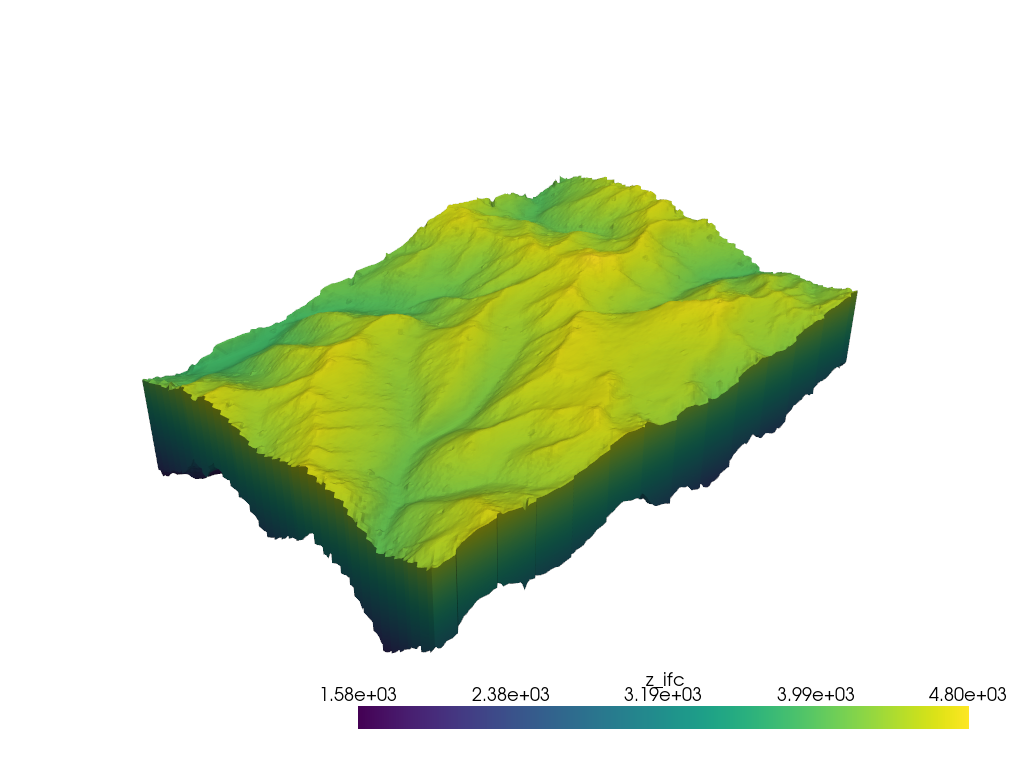

In [3]:
p = pv.Plotter()
p.add_mesh(vtk_file, scalars="z_ifc", cmap="viridis") 
p.show()

## Options for Clipping:

The function can both generate a 3D and 2D feature. In 3D, the original mesh is simply reduced to all vertices falling into the Polygons x and y boundary regardless of their z-dimension. 

The second option allows to select only the ground surface of the slice. This allows for example to get an estimate for the (near-)surface conditions on a glacier.

## Generating a 3D-Subset

Provide the vtk and shp objects to the function. You also need to specify the output structure. Either "3D" or "2D" / "surface". You can also select if you want to auto-plot the result (default is False).

The function works by first converting the polygon from the geopandas geodataframe structure to a pyvista surface object. This allows to use a built-in clip functionality of pyvista to generate the clipped result mesh. 

Clipping with Function: 100%|██████████████████████████████████████████████████[02:47<00:00]


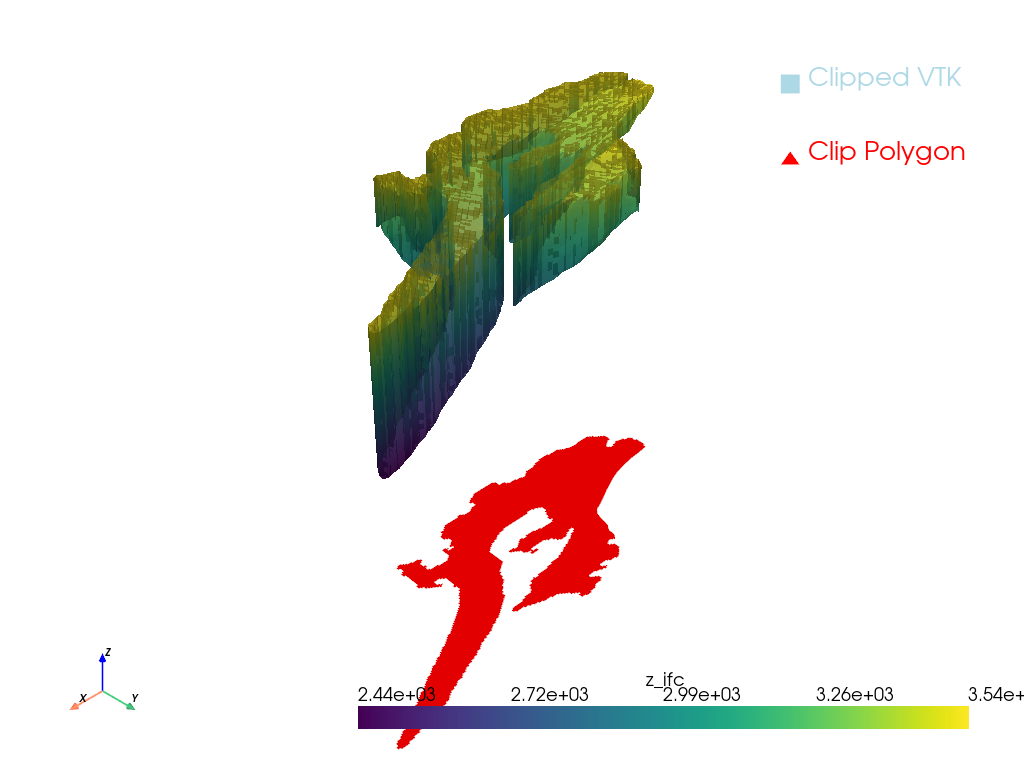

In [4]:
mesh3d = vsc.vtk_shp_clip(vtk_file, HEF, return_feature="3D", vis=True, notebook=True)

## Generating a Ground Surface Subset

The clip with reduction to surface works like the 3D case, just provide the "surface" or "2D" argument. Internally a 3D clip is generated. Then, the surface of the 3D structure is computed with a built-in pyvista function. Finally, this surface mesh is filtered using normals to ignore vertical surface parts and a height filter to ignore the top of the mesh. This leaves only the mesh parts on the bottom which correspond to the surface. If you use a new input mesh or another clipping polygon, you might need to adapt the two filtering thresholds for normals and height to get optimal results. They can be accessed through "normal_treshold" and "height_treshold".

Clipping with Function: 100%|██████████████████████████████████████████████████[02:58<00:00]


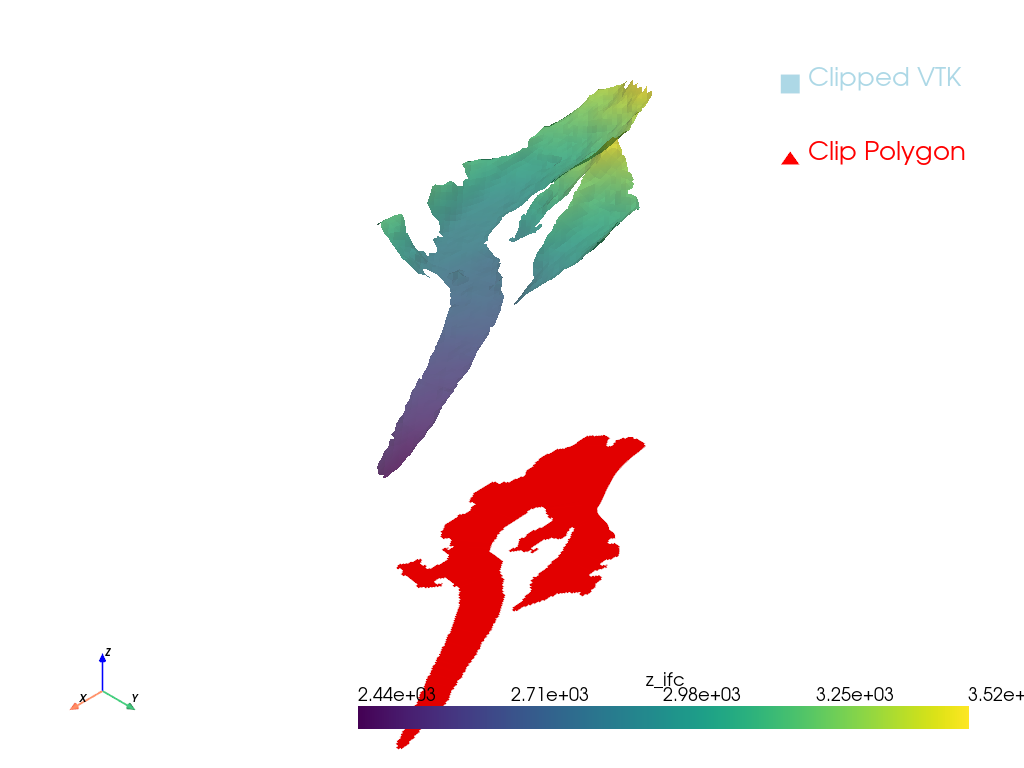

In [5]:
mesh2d = vsc.vtk_shp_clip(vtk_file, HEF, return_feature="surface", vis=True, notebook=True, normal_threshold = -0.1, height_threshold = 0.95)